In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tumor_cell_population_function(T,E,M):
    """
    Creates a differential equation to model a tumor cell population over time
    
    Parameters: 
    ----------
    r : float
        rate of tumor growth
    T : float
        number of tumor cells for time t
    b : float
        capacity of the tumor cell
    a : float
        paramter of cancer cleanup
    E : float
        number of effector cells at time t
    g : float
        half-saturation for cancer cleanup
    K_t : float
        rate of tumor cell death by chemotherapy drug
    M : float
        concentration of chemotherapy drug at time t
    Returns: 
    -------
    float
        change in tumor cells after one timestep
    """
    r = 4.31 * 10**(-3)
    b = 10**(-9)
    a = 3.41 * 10**(-10)
    g = 10**5
    K_t = 1 # not sure what this is yet
    dT = r*T*(1-(b*T))-a*((E*T)/(T+g))-(K_t*M*T)
    return dT

In [3]:
def tumor_effector_chemo_forward_integrate(initial_conditions, params, t):
    """
    Forward integrates the tumor, effector, chemotherapy model
    
    Parameters: 
    ----------
    initial_conditions : (int, int, int)
        Tuple of initial conditions for the IVP
    params : floats
        parameters of the model
    t : [ints]
        an array of timepoints, ASSUMED TO BE EQUALLY SPACED. 
    Returns: 
    -------
    np.array, np.array, np.array
        Returns a numpy array of T, E, and M arrays.
    """
    T0, E0, M0 = initial_conditions
    T, E, M = [T0], [E0], [M0]
    p, r, b, a, g, s, m, mu, gamma, h, K_t, K_e, V_m = params
    dt = t[1] - t[0]

    for _ in t[1:]:
        Tt = T[-1] + (r*T[-1]*(1-(b*T[-1]))-a*((E[-1]*T[-1])/(T[-1]+g))-(K_t*M[-1]*T[-1]))*dt
        Et = E[-1] + (s-(mu*E[-1]) + p*((E[-1]*T[-1])/(h+T[-1])) - (m*E[-1]*T[-1]) - (K_e*M[-1]*E[-1]))*dt
        Mt = M[-1] + (-gamma*M[-1]+V_m)*dt
        T.append(Tt)
        E.append(Et)
        M.append(Mt)
    return T, E, M

FUCK


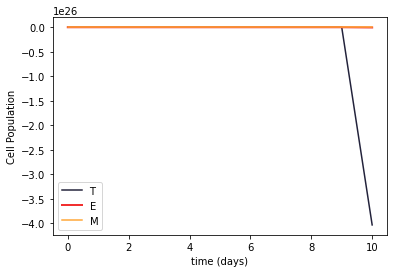

In [8]:
T0 = 40000
E0 = 30000
M0 = 0
initial_conditions = (T0, E0, M0)

p = 0.015
r = 0.00431
b = 10e-9
a = 3.41e-10
g = 10e5
s = 1.2e4
m = 2e-11
mu = 4.12e-2
gamma = 0.9
h = 2.02
K_t = 10
K_e = 5
V_m = 2
params = p, r, b, a, g, s, m, mu, gamma, h, K_t, K_e, V_m

# Timesteps in days
t_max = 10
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)

results = tumor_effector_chemo_forward_integrate(initial_conditions, params, t)

# Plot Results
colors = {
'T':'#22223B',
'E':'#F13030',
'M':'#FFA737'}

# Set up the axes
T,E,M = results
plt.plot(t,T,label='T',color=colors['T'])
plt.plot(t,E,label='E',color=colors['E'],linewidth=2)
plt.plot(t,M,label='M',color=colors['M'])

# Make the plot attractive
plt.legend(loc='best')
plt.xlabel('time (days)')
plt.ylabel('Cell Population')
print("FUCK")